<a href="https://colab.research.google.com/github/kowsalyamurugann/Exp10/blob/main/DSexp10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

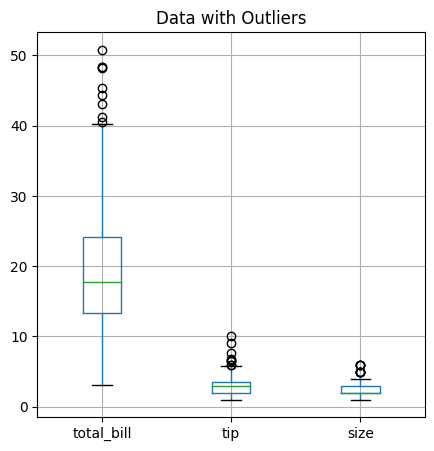

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Data with Outliers")
df.boxplot()
plt.show()

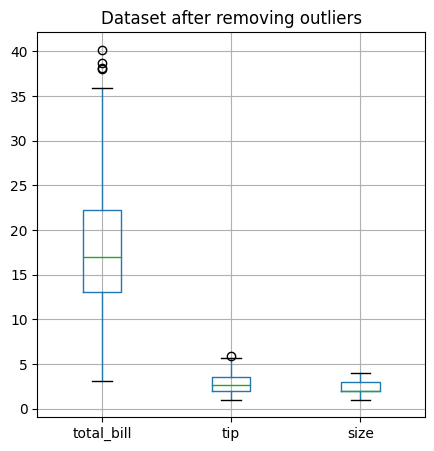

In [ ]:
plt.figure(figsize=(5,5))
cols = ['size','tip','total_bill']
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.title("Dataset after removing outliers")
df.boxplot()
plt.show()

In [ ]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [ ]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
from category_encoders import BinaryEncoder
be = BinaryEncoder()
data = be.fit_transform(df['sex'])
df = pd.concat([df,data],axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,sex_0,sex_1
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


In [ ]:
df['smoker'].unique()
data = be.fit_transform(df['smoker'])
df = pd.concat([df,data],axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,sex_0,sex_1,smoker_0,smoker_1
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3,0,1,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,1,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,0,1


In [ ]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
clim = ['Thur','Fri','Sat','Sun']
en= OrdinalEncoder(categories = [clim])
df['day']=en.fit_transform(df[["day"]])
df

,total_bill,tip,sex,smoker,day,time,size,sex_0,sex_1,smoker_0,smoker_1
0,16.99,1.01,Female,No,3.0,Dinner,2,0,1,0,1
1,10.34,1.66,Male,No,3.0,Dinner,3,1,0,0,1
2,21.01,3.50,Male,No,3.0,Dinner,3,1,0,0,1
3,23.68,3.31,Male,No,3.0,Dinner,2,1,0,0,1
4,24.59,3.61,Female,No,3.0,Dinner,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,2.0,Dinner,3,0,1,0,1
240,27.18,2.00,Female,Yes,2.0,Dinner,2,0,1,1,0
241,22.67,2.00,Male,Yes,2.0,Dinner,2,1,0,1,0
242,17.82,1.75,Male,No,2.0,Dinner,2,1,0,0,1


In [ ]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [ ]:
le = LabelEncoder()
df['time'] = le.fit_transform(df[["time"]])
df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,total_bill,tip,sex,smoker,day,time,size,sex_0,sex_1,smoker_0,smoker_1
0,16.99,1.01,Female,No,3.0,0,2,0,1,0,1
1,10.34,1.66,Male,No,3.0,0,3,1,0,0,1
2,21.01,3.50,Male,No,3.0,0,3,1,0,0,1
3,23.68,3.31,Male,No,3.0,0,2,1,0,0,1
4,24.59,3.61,Female,No,3.0,0,4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,2.0,0,3,0,1,0,1
240,27.18,2.00,Female,Yes,2.0,0,2,0,1,1,0
241,22.67,2.00,Male,Yes,2.0,0,2,1,0,1,0
242,17.82,1.75,Male,No,2.0,0,2,1,0,0,1


In [ ]:
df.drop('sex',axis=1,inplace=True)
df.drop('smoker',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
print("Min-max scaled data:")
print(scaled_data)

Min-max scaled data:
[[0.37520216 0.00206186 1.         ... 1.         0.         1.        ]
 [0.19595687 0.13608247 1.         ... 0.         0.         1.        ]
 [0.48355795 0.51546392 1.         ... 0.         0.         1.        ]
 ...
 [0.52830189 0.20618557 0.66666667 ... 0.         1.         0.        ]
 [0.39757412 0.15463918 0.66666667 ... 0.         0.         1.        ]
 [0.42345013 0.41237113 0.         ... 1.         0.         1.        ]]


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print("Standard scaled data:")
print(scaled_data)

Standard scaled data:
[[-0.17433249 -1.6629064   1.12086866 ...  1.3240417  -0.77737799
   0.77737799]
 [-1.10956519 -1.04970226  1.12086866 ... -0.75526322 -0.77737799
   0.77737799]
 [ 0.39102621  0.68613715  1.12086866 ... -0.75526322 -0.77737799
   0.77737799]
 ...
 [ 0.6244828  -0.72894933  0.25297383 ... -0.75526322  1.28637549
  -1.28637549]
 [-0.0576042  -0.96479707  0.25297383 ... -0.75526322 -0.77737799
   0.77737799]
 [ 0.07740683  0.21444165 -1.48281584 ...  1.3240417  -0.77737799
   0.77737799]]


<Axes: >

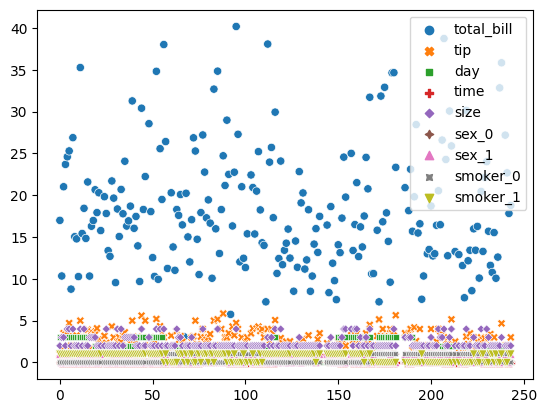

In [ ]:
import seaborn as sns
sns.scatterplot(data=df)

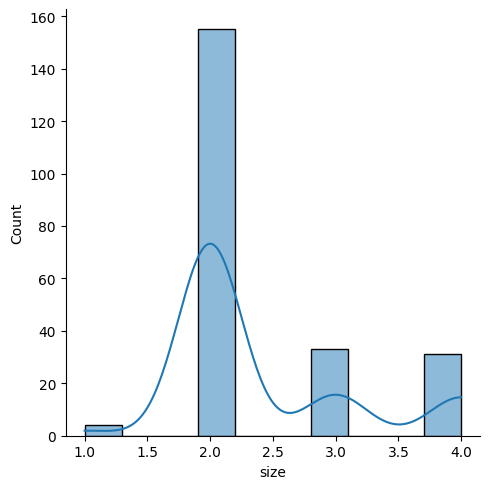

In [ ]:
sns.displot(df['size'],kde=True)

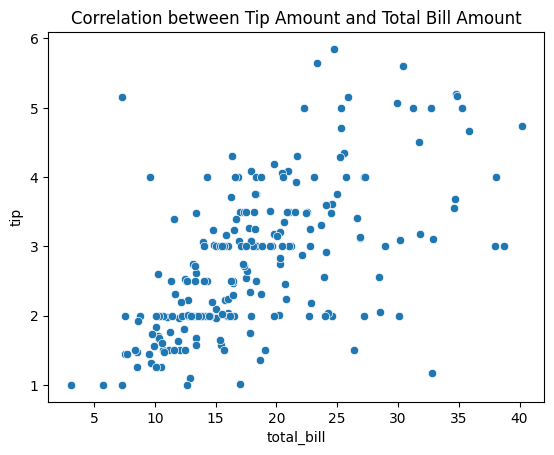

In [ ]:
sns.scatterplot(x="total_bill", y="tip", data=df)
plt.title("Correlation between Tip Amount and Total Bill Amount")
plt.show()

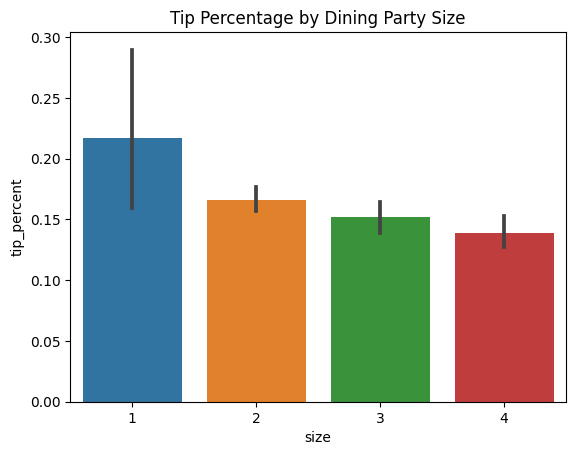

In [ ]:
df["tip_percent"] = df["tip"] / df["total_bill"]
sns.barplot(x=df['size'],y=df['tip_percent'],data=df)
plt.title("Tip Percentage by Dining Party Size")
plt.show()

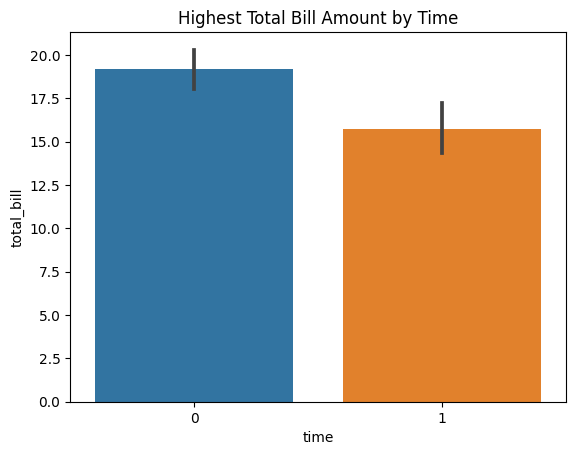

In [ ]:
sns.barplot(x=df['time'], y=df['total_bill'])
plt.title("Highest Total Bill Amount by Time")
plt.show()

In [ ]:
df.corr()

,total_bill,tip,day,time,size,sex_0,sex_1,smoker_0,smoker_1,tip_percent
total_bill,1.000000,0.602944,0.204599,-0.219143,0.547511,0.141528,-0.141528,0.084578,-0.084578,-0.386138
tip,0.602944,1.000000,0.174969,-0.141599,0.379489,0.056455,-0.056455,0.042815,-0.042815,0.386052
day,0.204599,0.174969,1.000000,-0.869948,0.253397,0.213561,-0.213561,-0.060366,0.060366,0.016441
time,-0.219143,-0.141599,-0.869948,1.000000,-0.196569,-0.188808,0.188808,-0.035580,0.035580,0.039516
size,0.547511,0.379489,0.253397,-0.196569,1.000000,0.100761,-0.100761,-0.127626,0.127626,-0.190313
sex_0,0.141528,0.056455,0.213561,-0.188808,0.100761,1.000000,-1.000000,0.009837,-0.009837,-0.079584
sex_1,-0.141528,-0.056455,-0.213561,0.188808,-0.100761,-1.000000,1.000000,-0.009837,0.009837,0.079584
smoker_0,0.084578,0.042815,-0.060366,-0.035580,-0.127626,0.009837,-0.009837,1.000000,-1.000000,0.064706
smoker_1,-0.084578,-0.042815,0.060366,0.035580,0.127626,-0.009837,0.009837,-1.000000,1.000000,-0.064706
tip_percent,-0.386138,0.386052,0.016441,0.039516,-0.190313,-0.079584,0.079584,0.064706,-0.064706,1.000000


<Axes: >

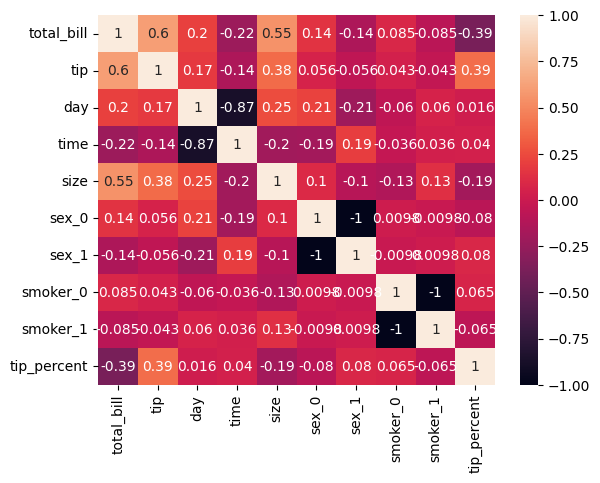

In [ ]:
sns.heatmap(df.corr(),annot=True)